In [25]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [26]:
downloaded = drive.CreateFile({'id':'1wd4DXf4nb9dWwieEc3LMkfHfc5V51bha'}) 
downloaded.GetContentFile('train.csv') 
downloaded = drive.CreateFile({'id':'1UUPUpFC5hiPO9066Cz7tfUzlmOK5SsES'}) 
downloaded.GetContentFile('test.csv') 

In [27]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot
from sklearn.preprocessing  import LabelEncoder,OrdinalEncoder
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing  import LabelEncoder,OrdinalEncoder

In [31]:
train_df=pd.read_csv('train.csv')

1)

In [48]:
proccessed_data=train_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
proccessed_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


2)

In [40]:
proccessed_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [50]:
X = proccessed_data.drop(['Survived','SibSp', 'Parch'], axis=1)
x = pd.get_dummies(X, dummy_na = True) 
x.fillna(x.mean(), inplace = True)
y = proccessed_data.loc[:,'Survived'] 

3)

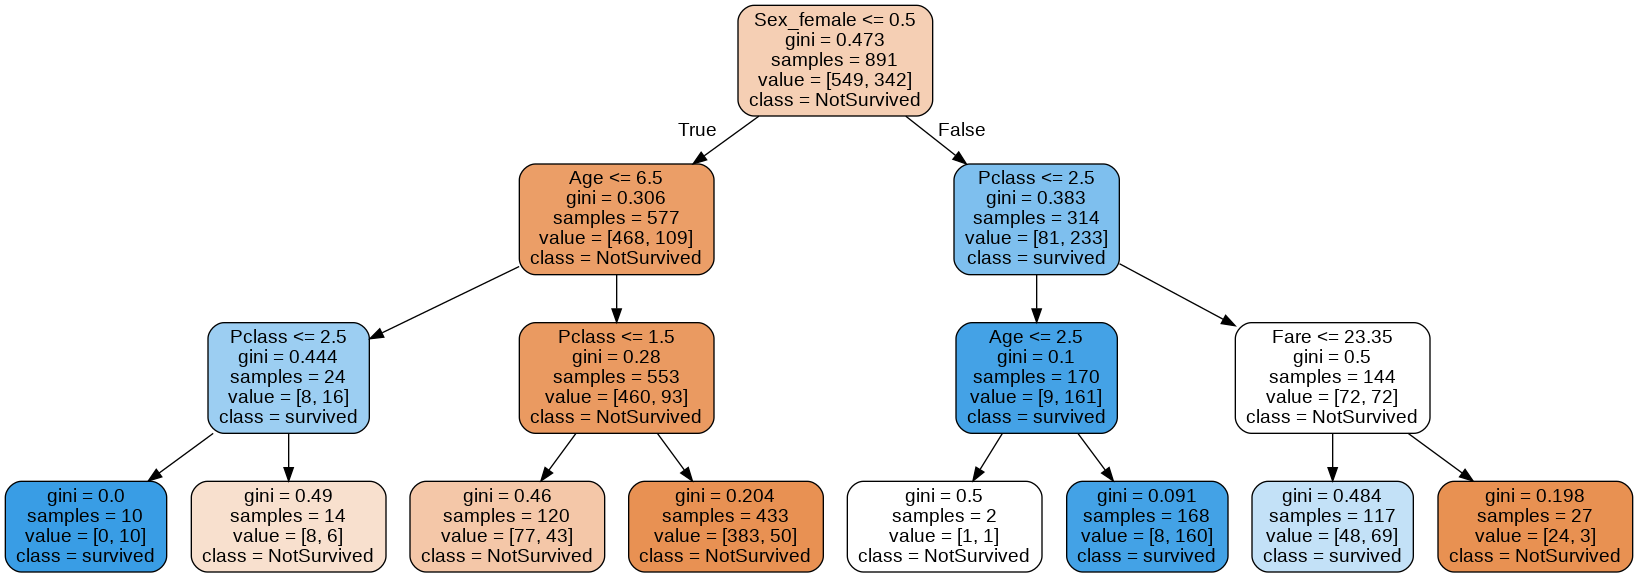

In [51]:
tree_classification = DecisionTreeClassifier(max_depth=3) 
tree_classification.fit(x,y)
dot_data = StringIO()  
export_graphviz(tree_classification, out_file = dot_data, class_names = ['NotSurvived','survived'], feature_names = x.columns, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

4)

In [54]:
dt=DecisionTreeClassifier()
dt_scores = cross_val_score(dt, x, y, cv=10)
dt_scores.mean()

0.7856928838951311

5)

In [55]:
rf=RandomForestClassifier()
rf_scores = cross_val_score(rf, x, y, cv=10)
rf_scores.mean()

0.8103995006242197